## One Factor ANOVA with R

Data from: https://researchguides.library.vanderbilt.edu/c.php?g=156859&p=1171834

## Reading and organizing your data

In [2]:
df = read.csv('data/color-anova-example.csv')

df

block,color,response
<chr>,<chr>,<dbl>
a,red,1.90
b,red,2.60
c,red,3.40
d,red,0.80
e,red,5.30
f,red,1.50
g,red,4.50
h,red,2.60
i,red,1.16


In [6]:
df$color = as.factor(df$color)

df

block,color,response
<chr>,<fct>,<dbl>
a,red,1.90
b,red,2.60
c,red,3.40
d,red,0.80
e,red,5.30
f,red,1.50
g,red,4.50
h,red,2.60
i,red,1.16


## Plotting data

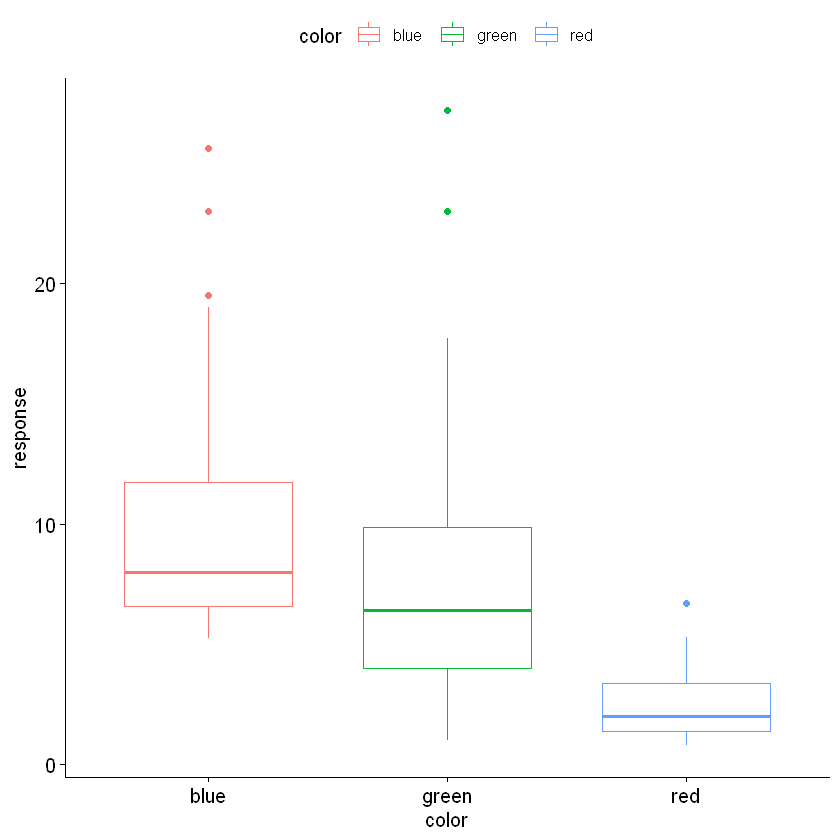

In [10]:
library("ggpubr")

ggboxplot(df, 
          x = "color", 
          y = "response", 
          color = "color")

## Descriptive statistics

In [11]:
summary(df)

    block             color       response     
 Length:72          blue :24   Min.   : 0.800  
 Class :character   green:24   1st Qu.: 2.000  
 Mode  :character   red  :24   Median : 5.900  
                               Mean   : 7.218  
                               3rd Qu.: 9.000  
                               Max.   :27.200  

In [18]:
red_condition = subset(df, color == 'red')

red_condition 

,block,color,response
,<chr>,<fct>,<dbl>
1,a,red,1.90
2,b,red,2.60
3,c,red,3.40
4,d,red,0.80
5,e,red,5.30
6,f,red,1.50
7,g,red,4.50
8,h,red,2.60
9,i,red,1.16


In [21]:
summary(red_condition$response)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.800   1.405   2.000   2.492   3.400   6.700 

In [22]:
blue_condition = subset(df, color == 'blue')

summary(blue_condition$response)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.27    6.60    8.00   10.63   11.75   25.60 

In [23]:
green_condition = subset(df, color == 'green')

summary(green_condition$response)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    4.00    6.40    8.53    9.85   27.20 

## One Factor ANOVA

In [20]:
?aov

![](images/oneway_anov_doc.png)

In [7]:
anova_mod <- aov(response ~ color, data = df)

summary(anova_mod)

            Df Sum Sq Mean Sq F value   Pr(>F)    
color        2  857.2   428.6   14.81 4.44e-06 ***
Residuals   69 1996.4    28.9                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## Post-hoc tests

In [24]:
TukeyHSD(anova_mod)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = response ~ color, data = df)

$color
                diff        lwr       upr     p adj
green-blue -2.101667  -5.821045  1.617711 0.3709119
red-blue   -8.140417 -11.859795 -4.421039 0.0000049
red-green  -6.038750  -9.758128 -2.319372 0.0006628


## Summary